In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=pd.read_excel("Gold.xlsx")

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Year,Gold Price (10g),Rate of Change (%),Imports value,Exports Value,Imports Percentage (%),Exports Percentage (%),Growth Rate (Gold Exports),GDP,GOLD RESERVES (IN CRORE),Exchange Rate(USD-INR),CPI Inflation Rate (%),Repo Rate (%),Unemployment Rate (%)
0,1999,4234.0,1.92,3180500,636100,0.90,0.0017,-,6.2,12559,43.060000,4.67,8.00,5.4
1,2000,4400.0,3.92,3300000,660000,0.91,0.0022,0.0375,4.0,12973,44.948154,4.01,9.00,5.6
2,2001,4300.0,-2.27,3450000,690000,0.92,0.0026,0.0455,5.2,12711,47.172949,3.78,8.75,5.8
3,2002,4990.0,16.05,3600000,720000,0.92,0.0025,0.0435,5.4,14868,48.575595,4.30,5.75,5.9
4,2003,5600.0,12.22,4200000,840000,0.92,0.0025,0.1667,4.0,16785,46.538938,3.81,5.00,5.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        25 non-null     int64  
 1   Gold Price (10g)            25 non-null     float64
 2   Rate of Change (%)          25 non-null     float64
 3   Imports value               25 non-null     int64  
 4   Exports Value               25 non-null     int64  
 5   Imports Percentage (%)      25 non-null     float64
 6   Exports Percentage (%)      25 non-null     float64
 7   Growth Rate (Gold Exports)  25 non-null     object 
 8   GDP                         25 non-null     float64
 9   GOLD RESERVES (IN CRORE)    25 non-null     int64  
 10  Exchange Rate(USD-INR)      25 non-null     float64
 11  CPI Inflation Rate (%)      25 non-null     float64
 12  Repo Rate (%)               25 non-null     float64
 13  Unemployment Rate (%)       25 non-nu

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Year                          0
Gold Price (10g)              0
Rate of Change (%)            0
Imports value                 0
Exports Value                 0
Imports Percentage (%)        0
Exports Percentage (%)        0
Growth Rate (Gold Exports)    0
GDP                           0
GOLD RESERVES (IN CRORE)      0
Exchange Rate(USD-INR)        0
CPI Inflation Rate (%)        0
Repo Rate (%)                 0
Unemployment Rate (%)         0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               Year  Gold Price (10g)  Rate of Change (%)  Imports value  \
count     25.000000         25.000000           25.000000   2.500000e+01   
unique          NaN               NaN                 NaN            NaN   
top             NaN               NaN                 NaN            NaN   
freq            NaN               NaN                 NaN            NaN   
mean    2011.720000      25425.360000           13.222800   1.708866e+07   
std        7.721831      18872.614381           16.159862   1.207911e+07   
min     1999.000000       4234.000000           -5.940000   3.180500e+06   
25%     2005.000000       7000.000000            1.920000   5.250000e+06   
50%     2012.000000      26400.000000            8.650000   1.978225e+07   
75%     2018.000000      31438.000000           17.610000   2.328750e+07   
max     2024.000000      73780.000000           54.290000   3.959250e+07   

        Exports Value  Imports Percentage (%)  Exports Percentage 

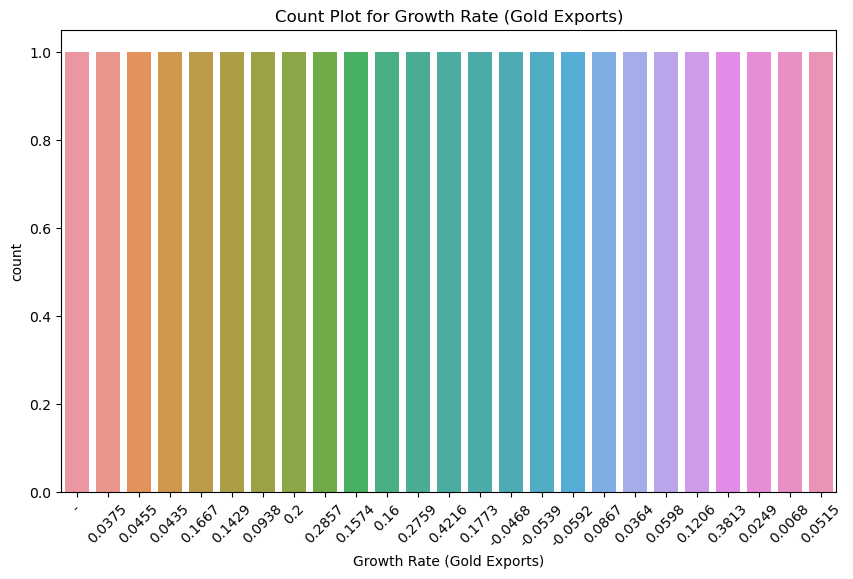

In [8]:
# Count plot for categorical variables (if any exist)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\gadiy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


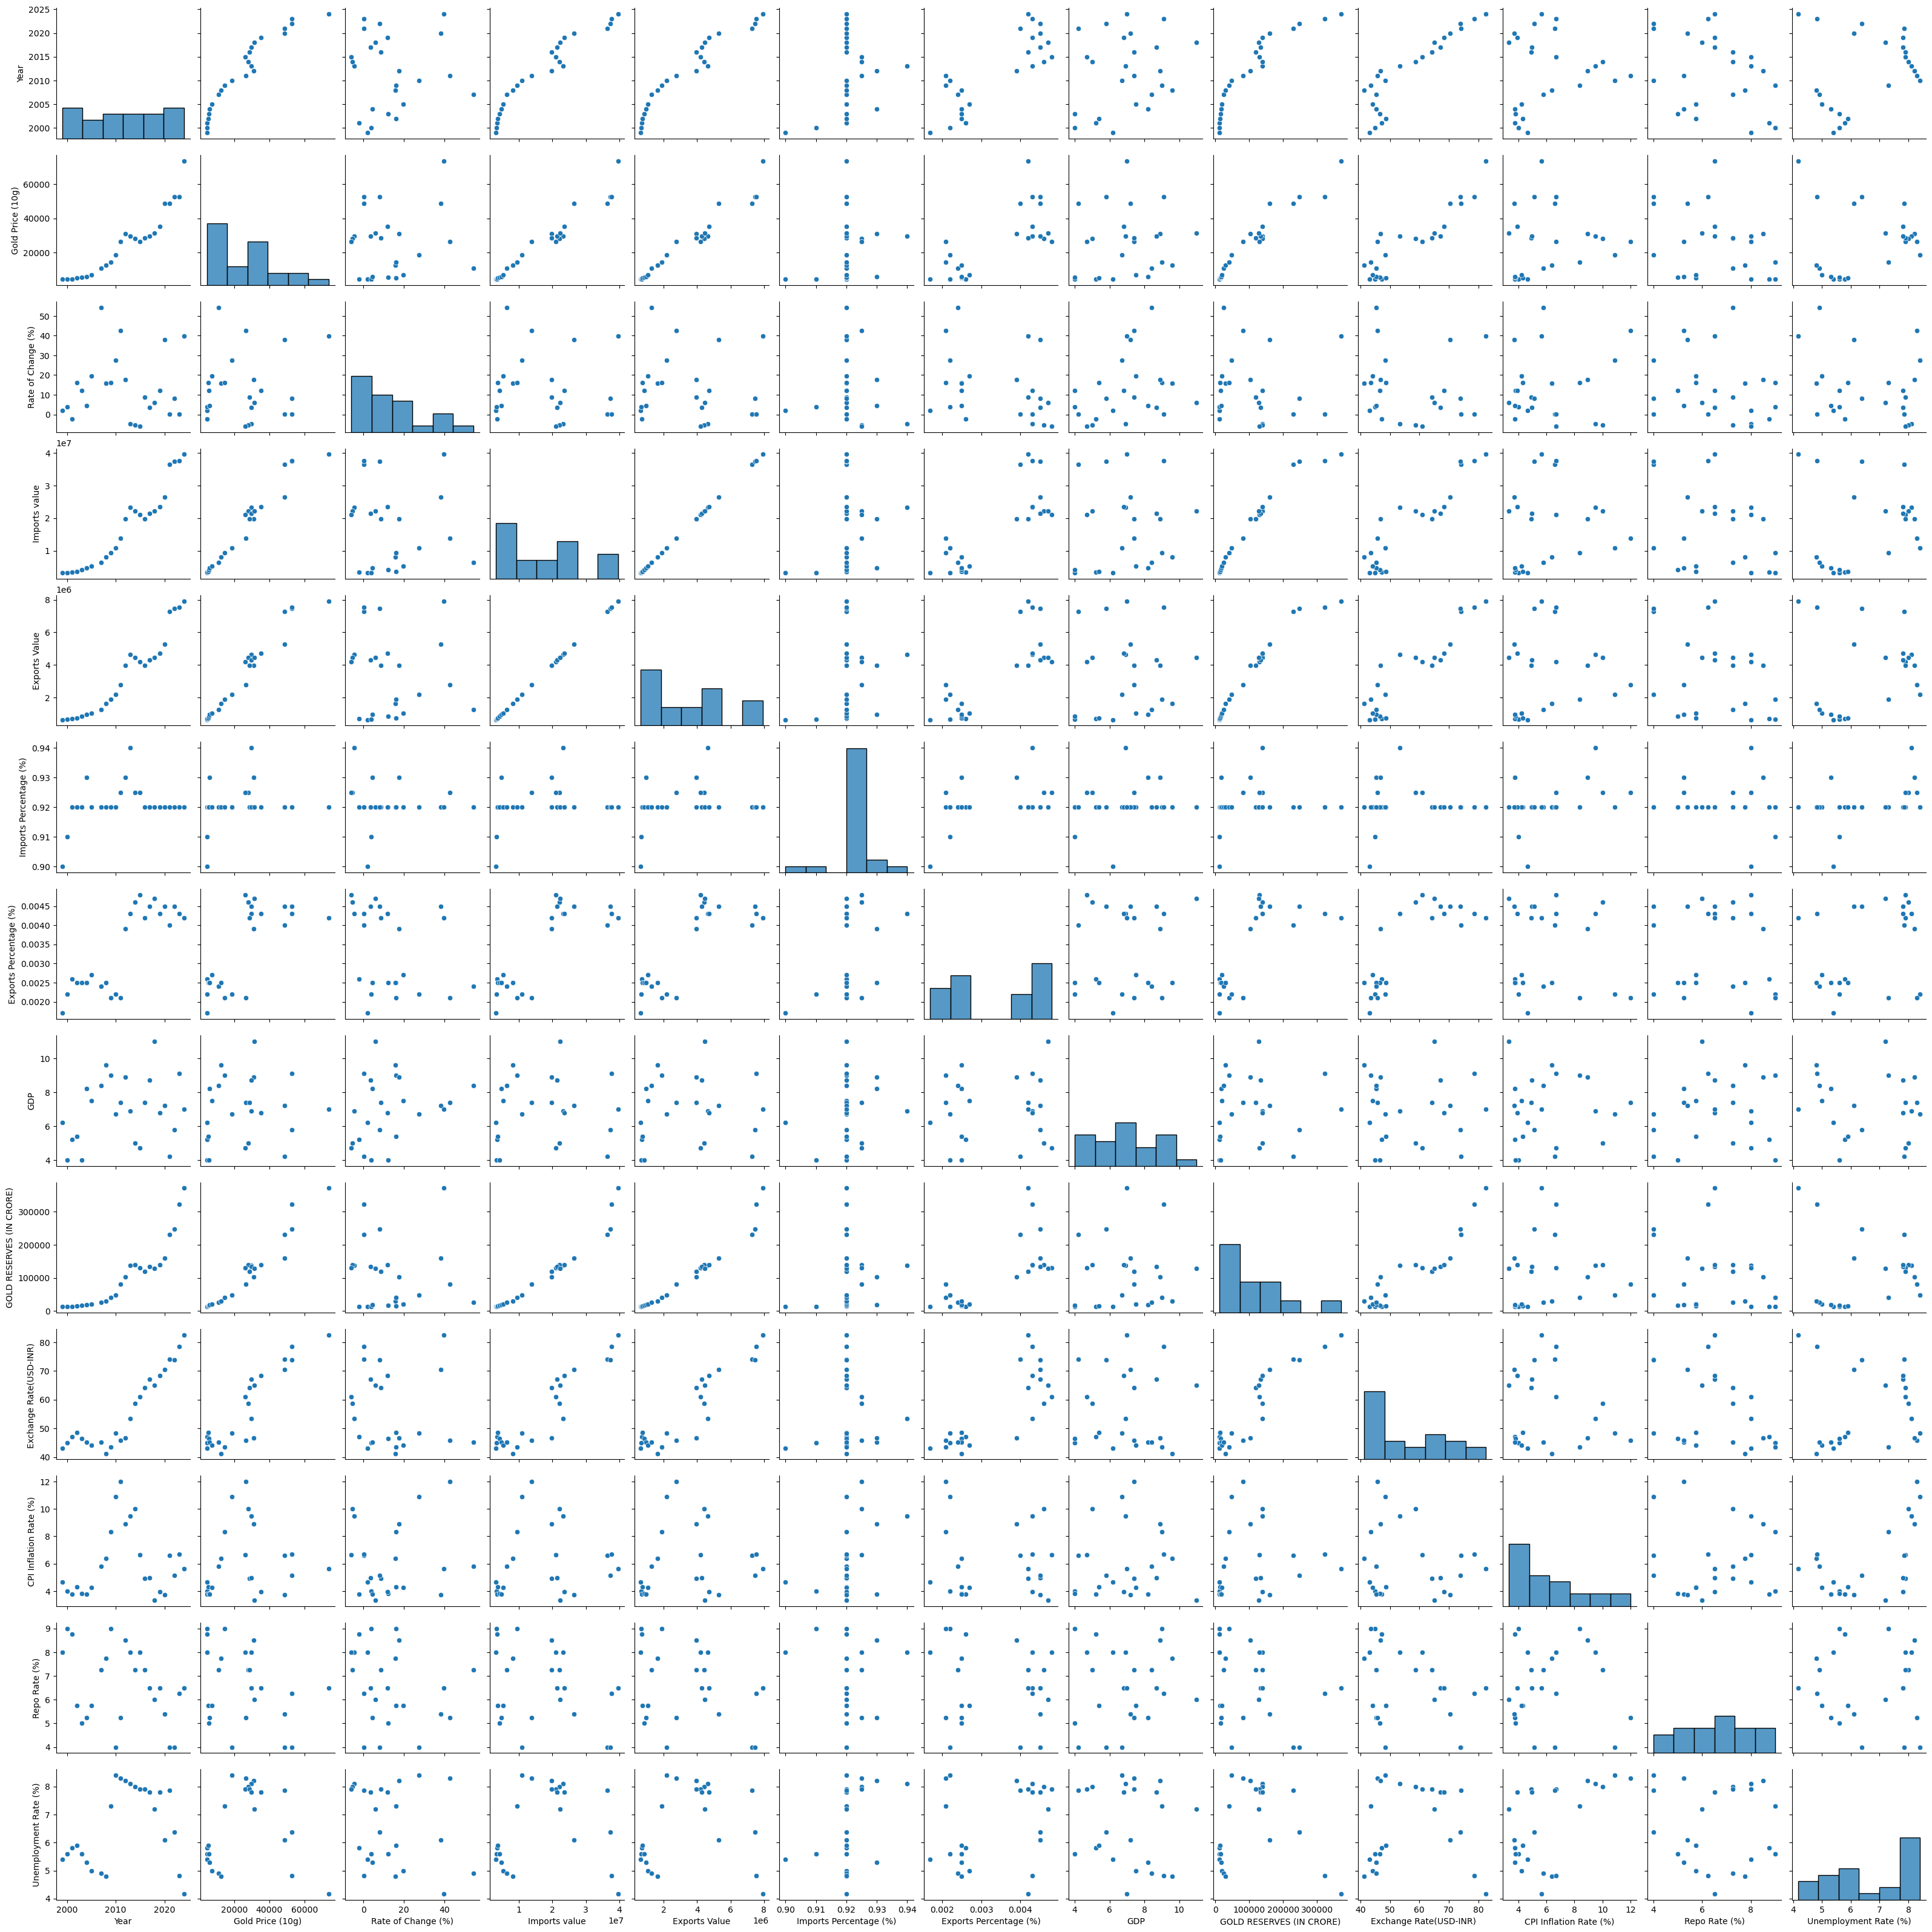

In [9]:
# Pairplot (for numeric data)
if len(df.select_dtypes(include=['number']).columns) > 1:
    sns.pairplot(df.select_dtypes(include=['number']))
    plt.show()



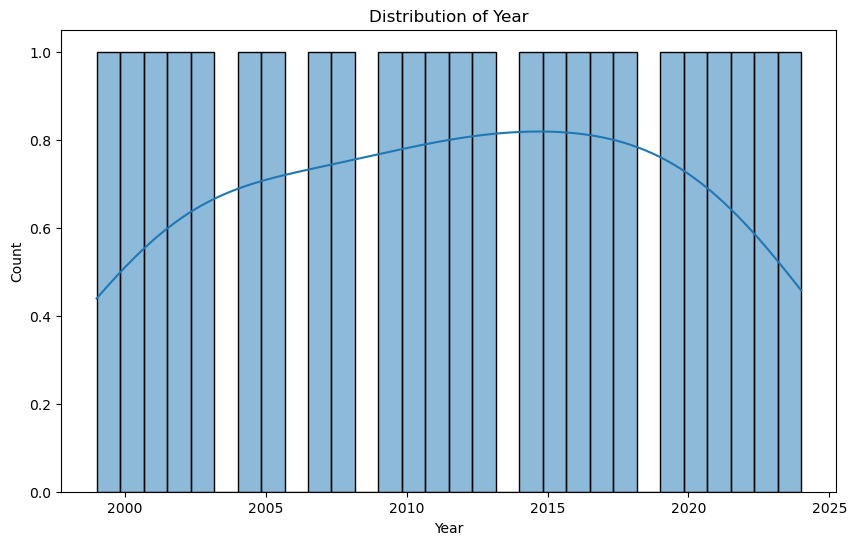

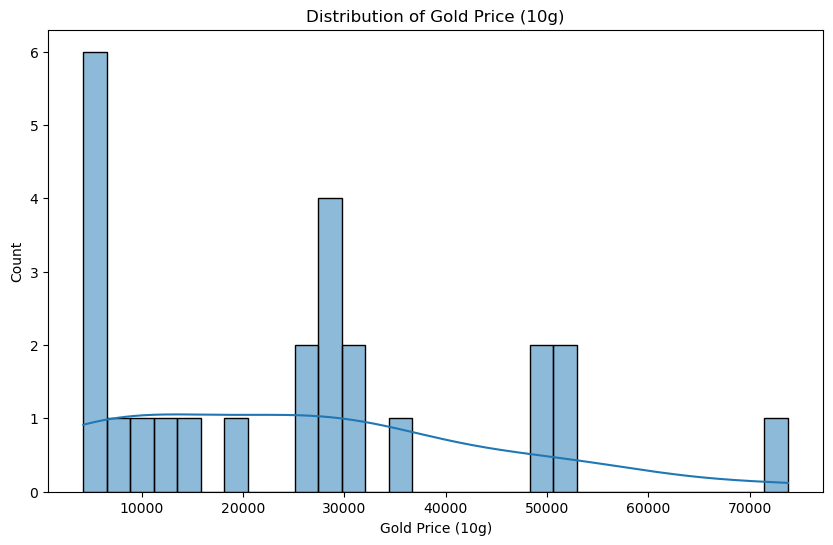

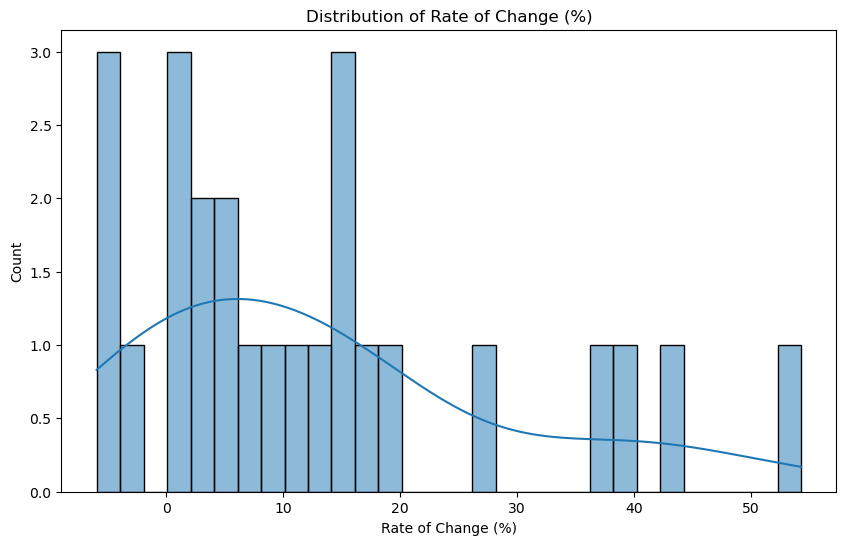

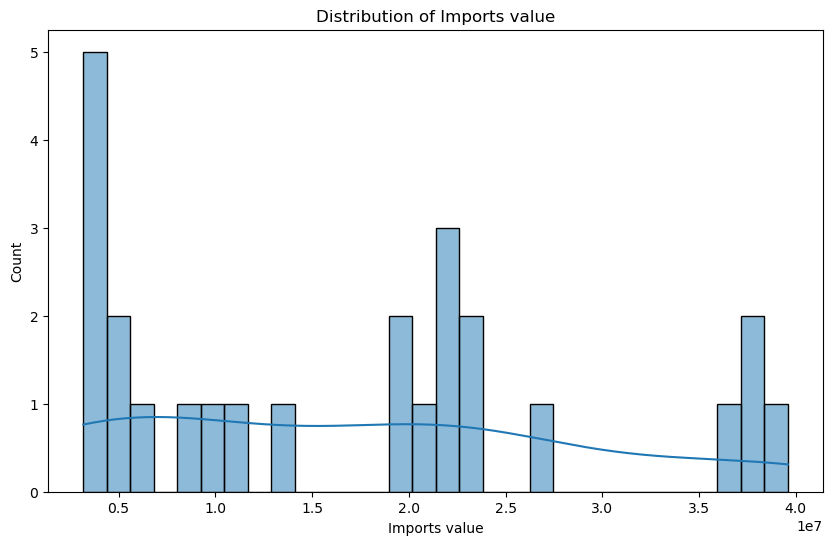

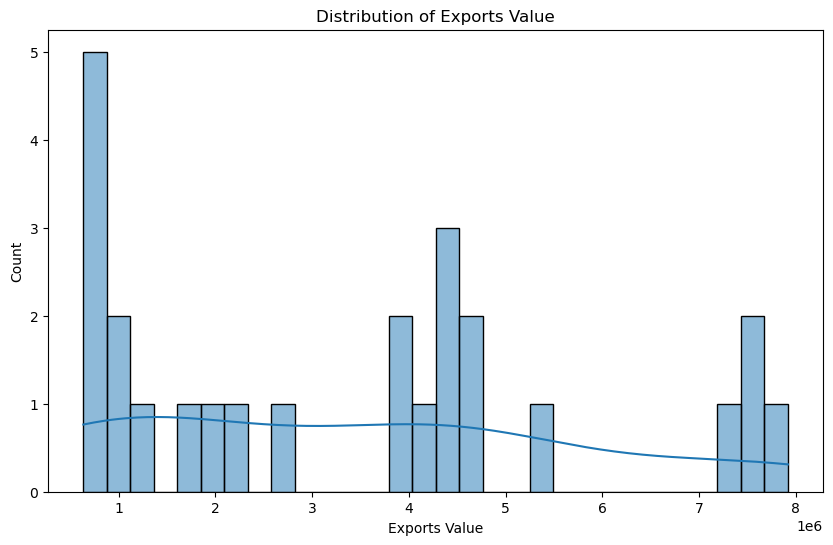

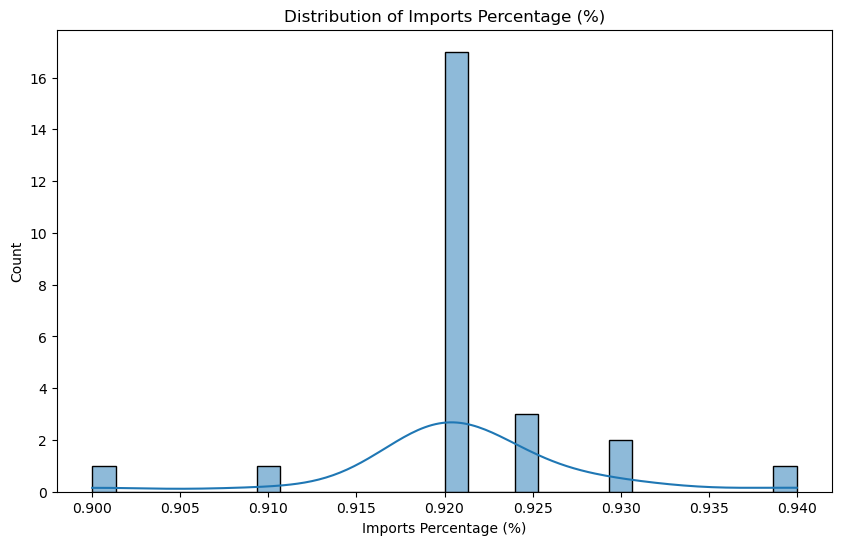

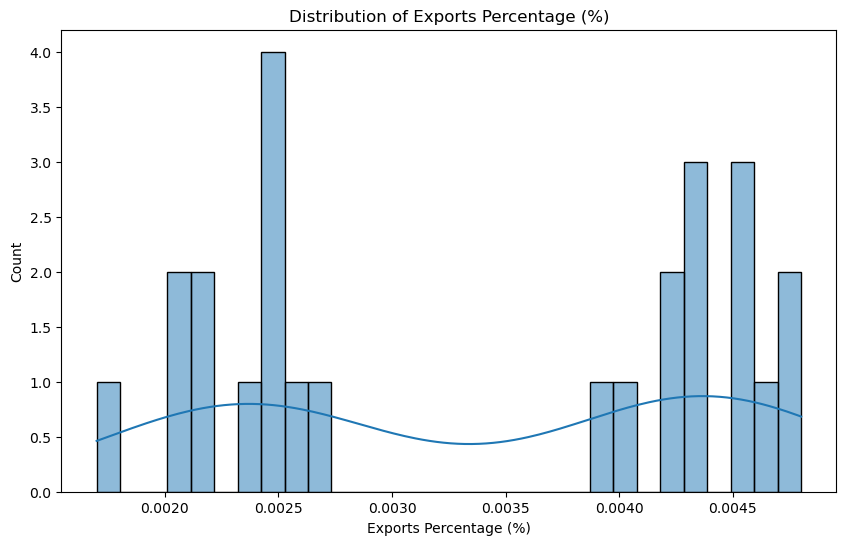

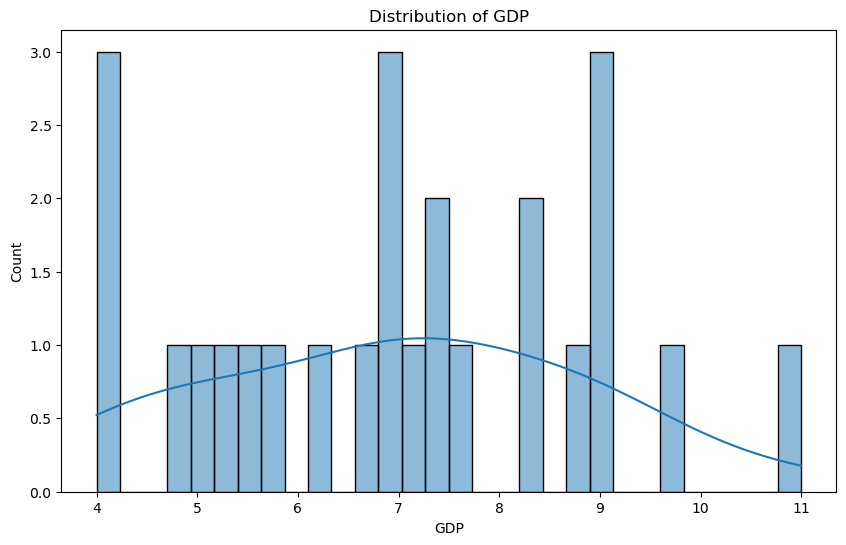

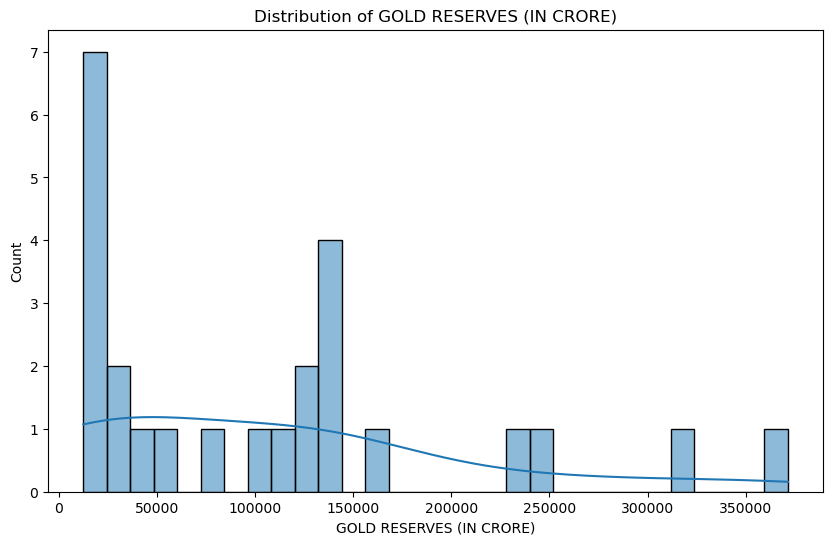

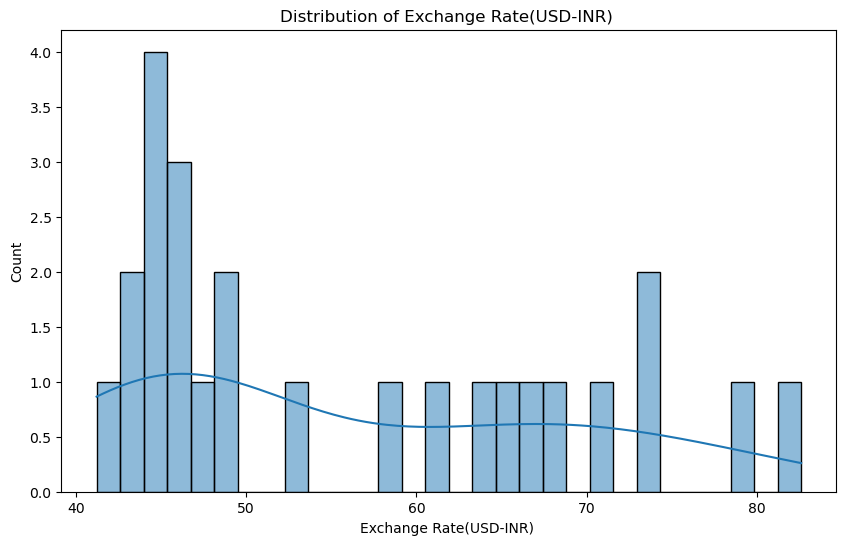

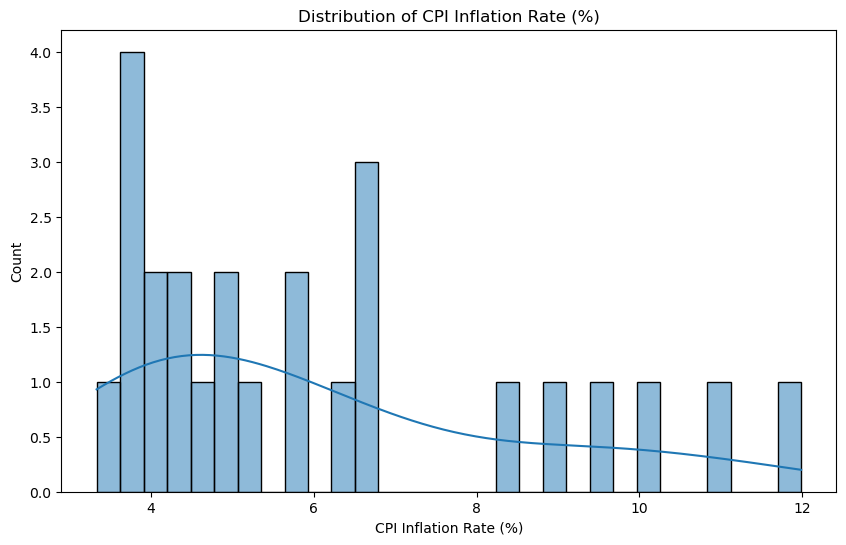

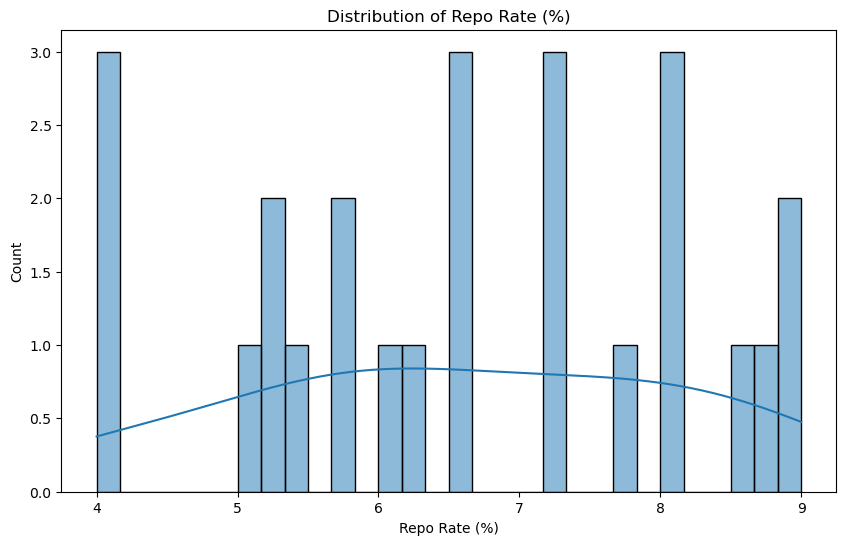

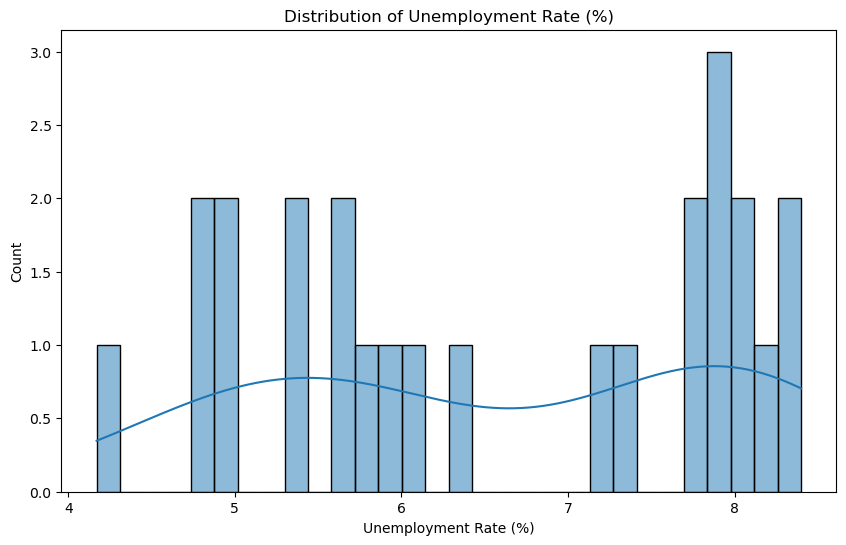

In [10]:
# Distribution plots for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

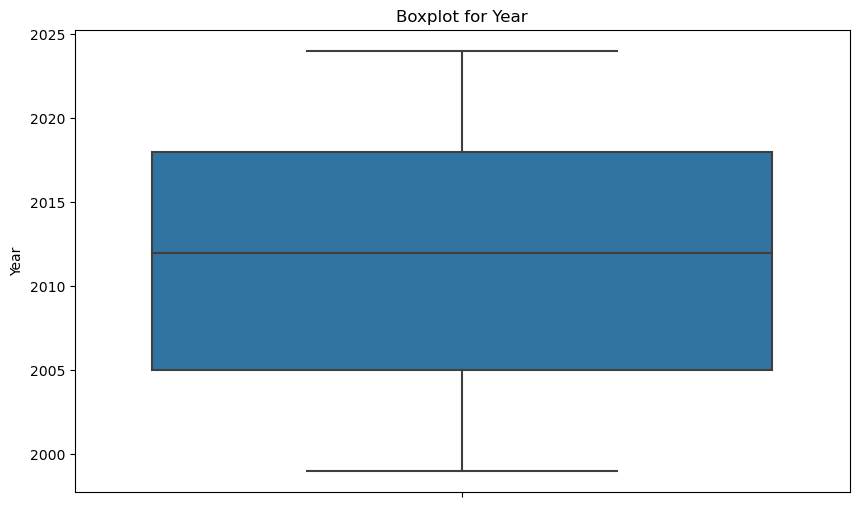

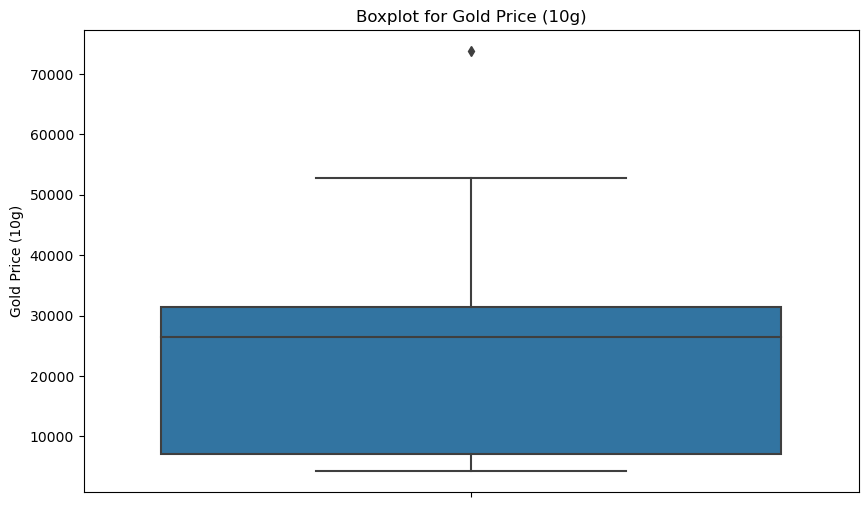

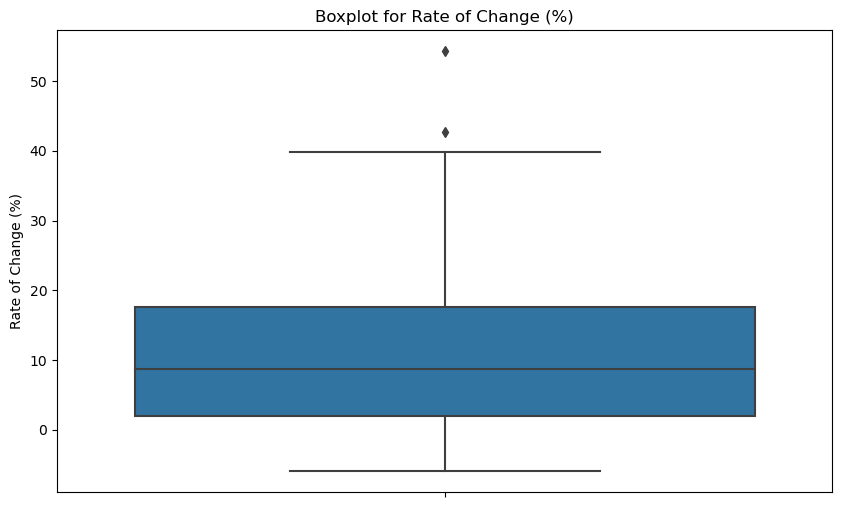

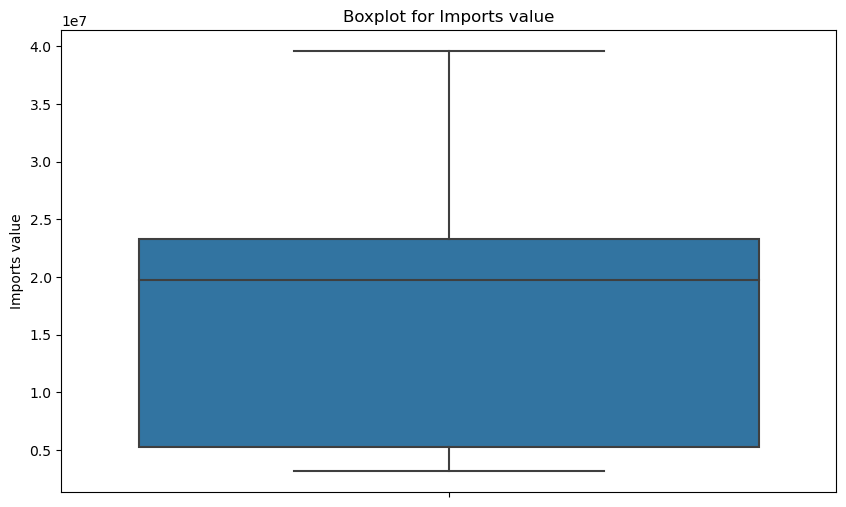

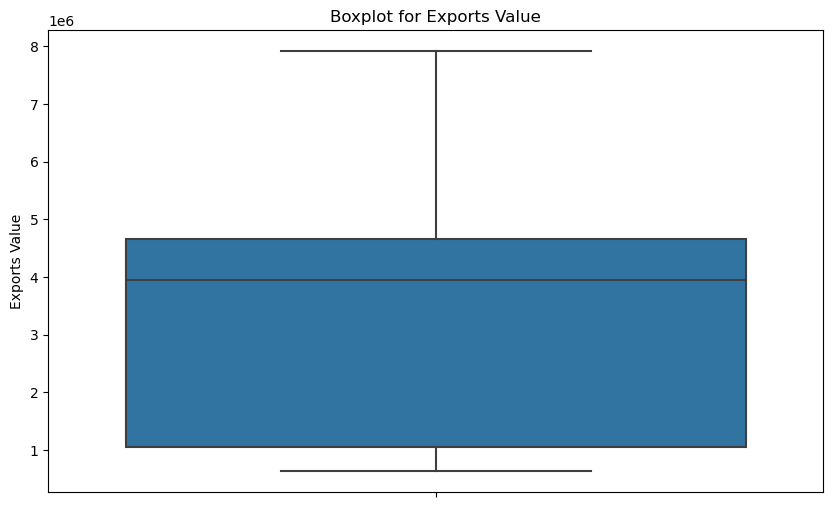

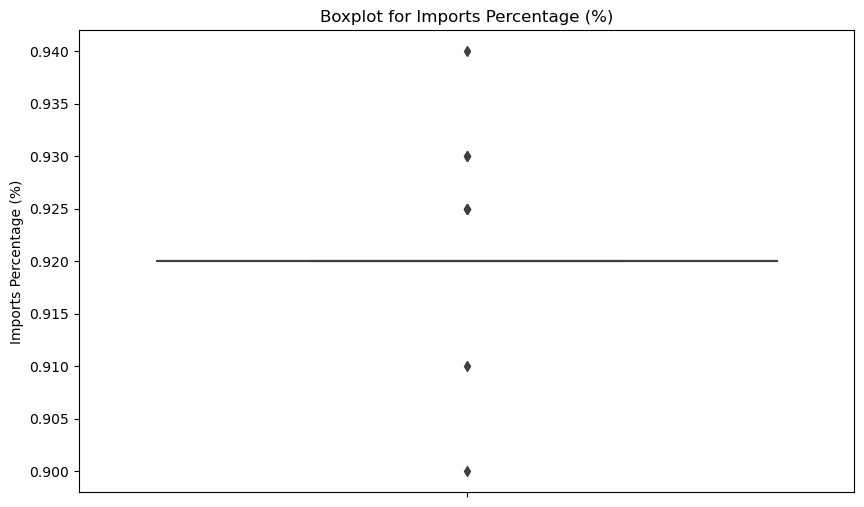

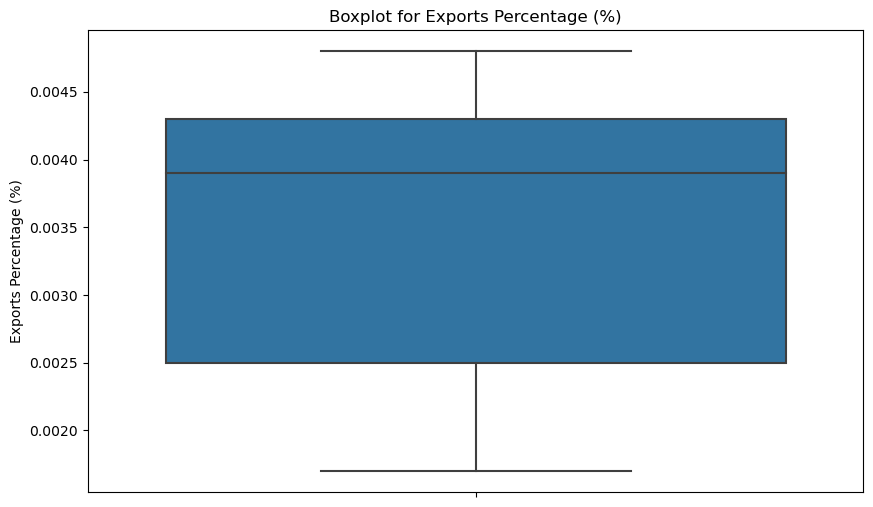

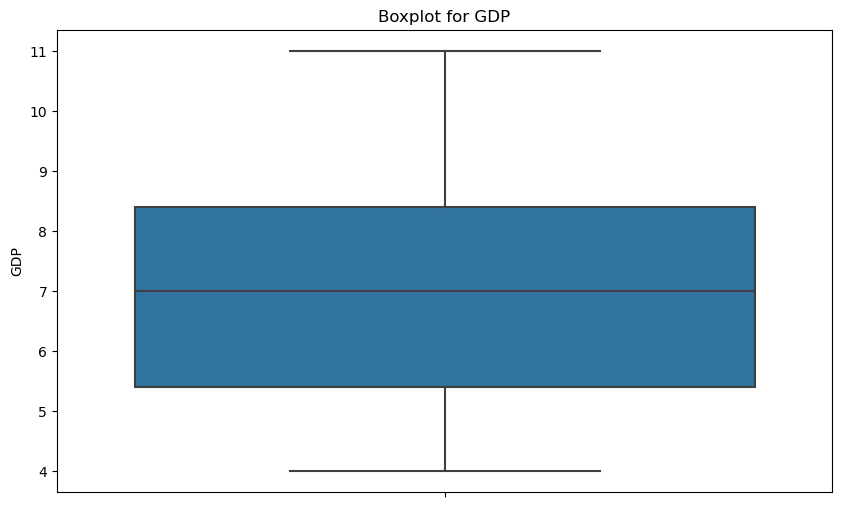

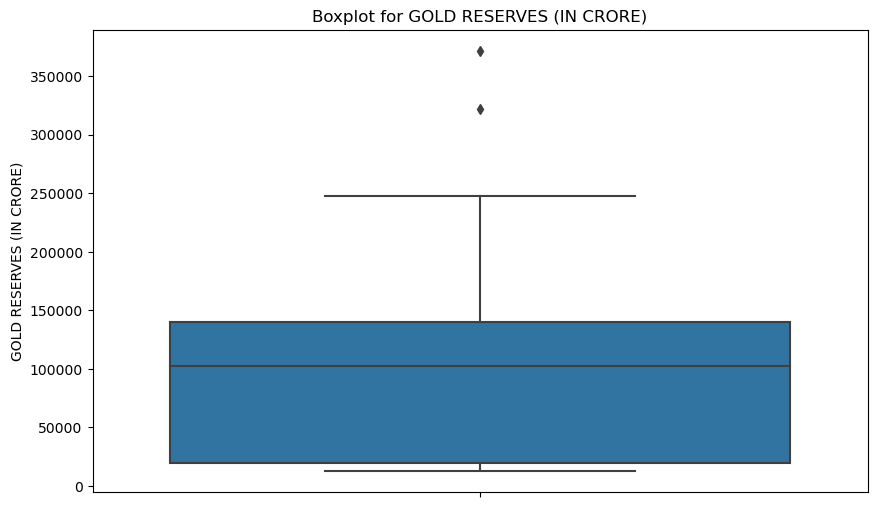

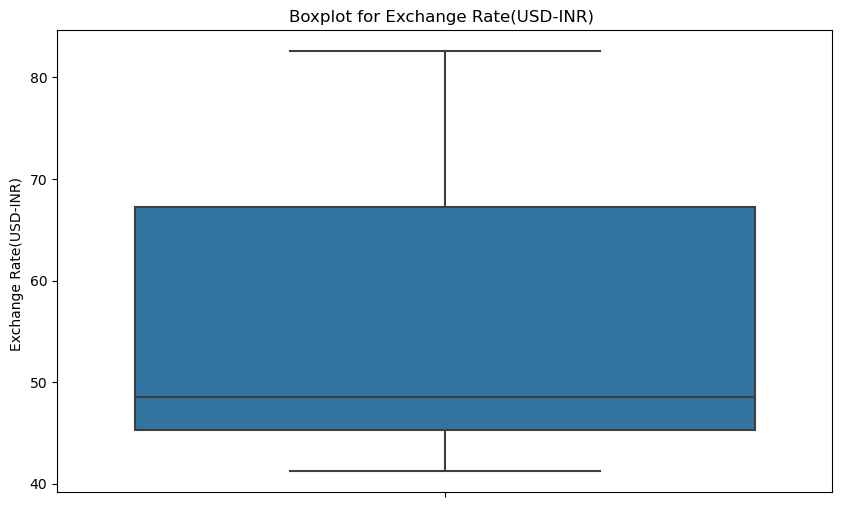

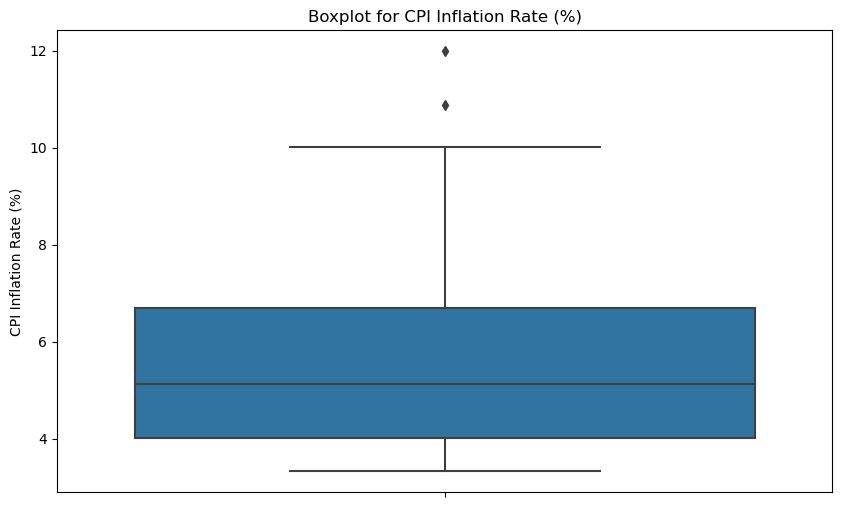

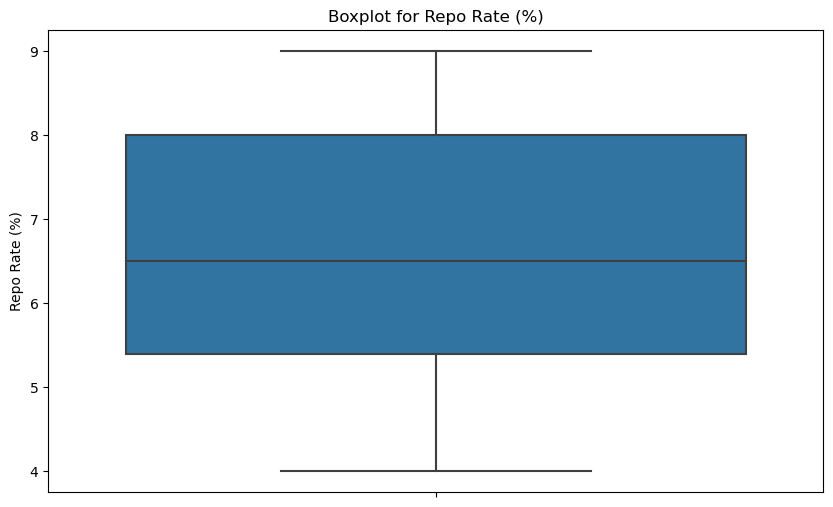

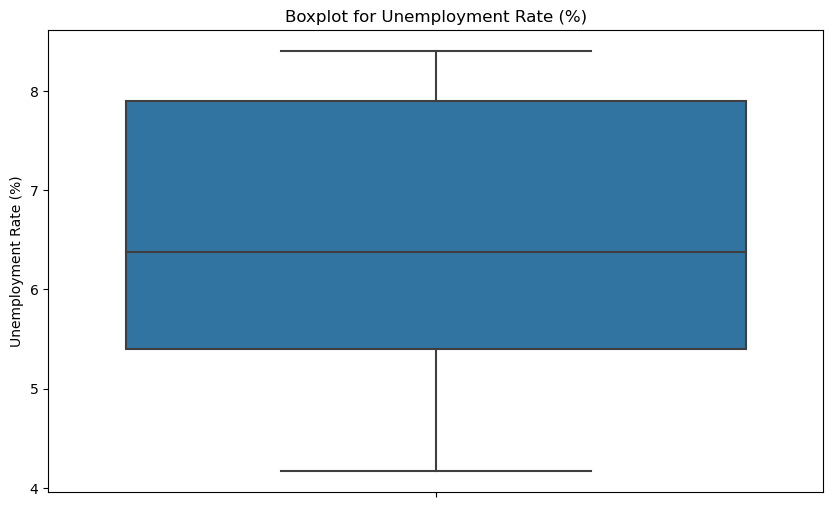

In [11]:
# Boxplots for outliers detection
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


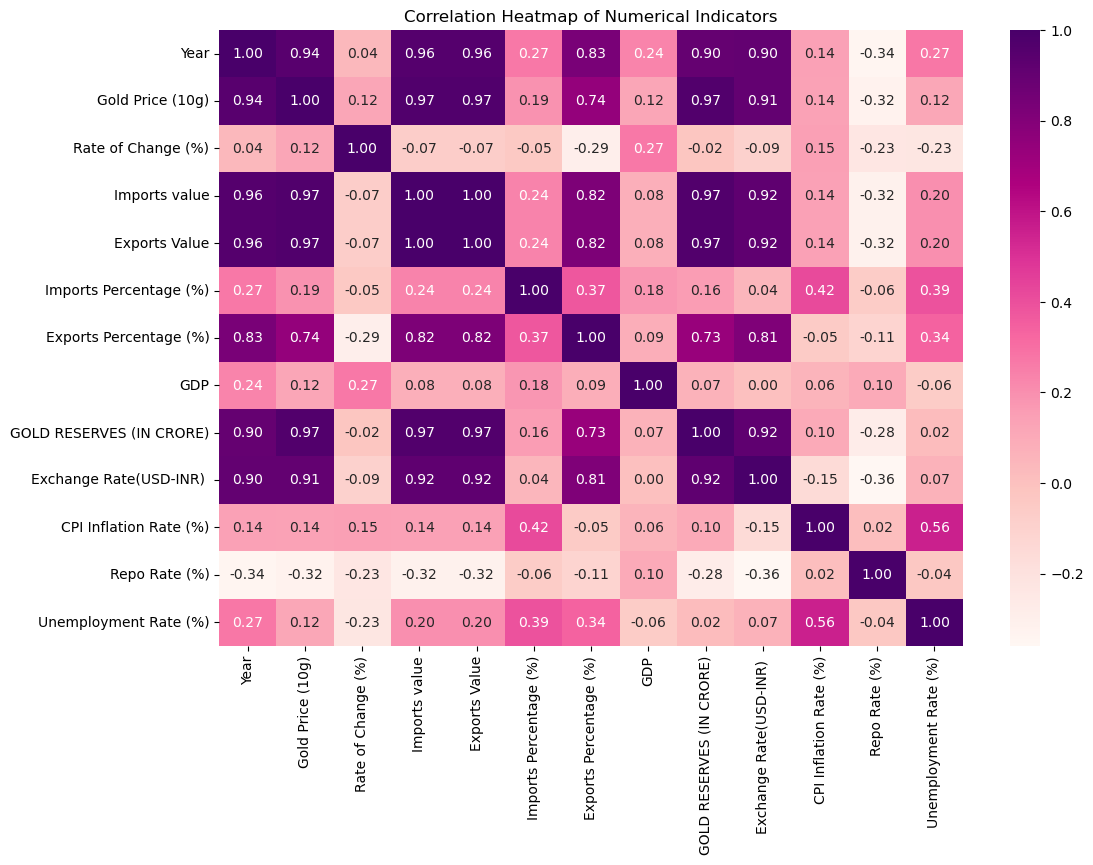

In [12]:
# Select only numerical columns from the dataset
data = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical columns
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu', cbar=True)
plt.title('Correlation Heatmap of Numerical Indicators')
plt.show()

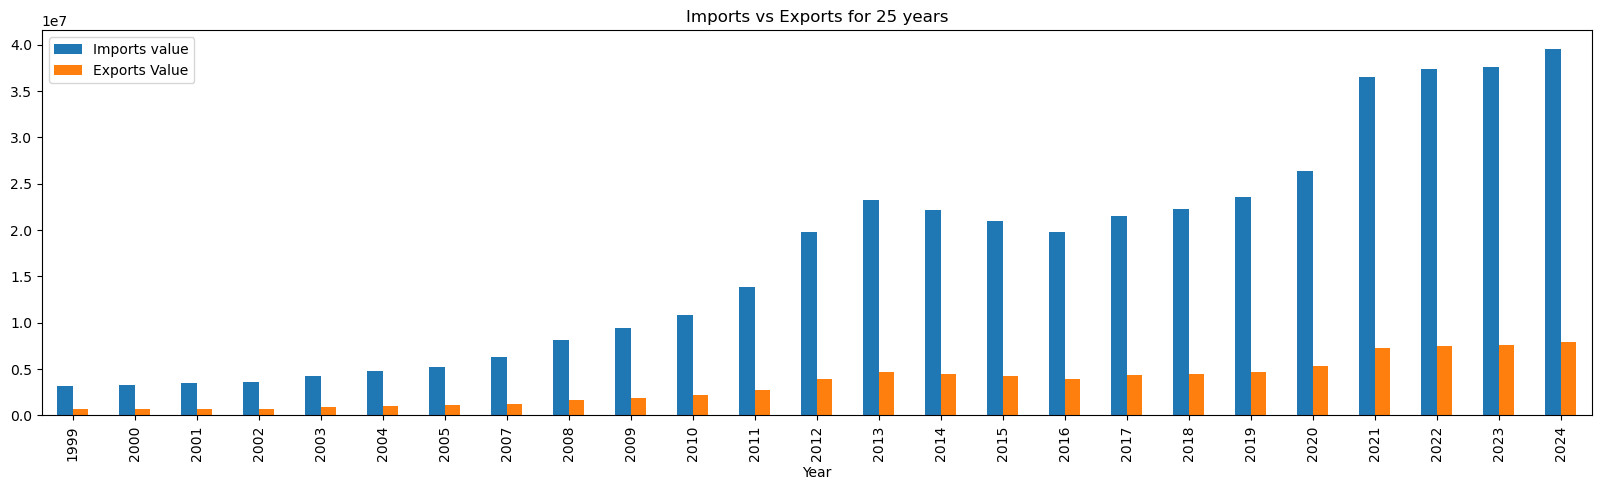

In [13]:
# Form DataFrame from data
df = pd.DataFrame(data, columns=["Year","Imports value","Exports Value"])
# Plot unstacked multiple columns such as population and year from DataFrame
df.plot(x="Year", y=["Imports value","Exports Value"],kind="bar", figsize=(20, 5))


# Display pgelot
plt.title('Imports vs Exports for 25 years')
plt.show()